# <b>Softmax</b>

<b>[개요]</b>
  - hidden layer에는 적용하지않고, 다진분류의 output layer에만 적용

<b>[함수식]</b> <BR>
  - 𝐟(𝐱𝚔) = 𝒆𝒙𝒑(𝒙𝚔 - 𝒎) / ∑ exp(𝒙𝑖 - 𝒎)
  - 𝒎 = max(𝒙𝚔)
  - 개별확률 / 각각의 확률합으로 나누어 <br> 
    다진분류인 경우에는 softmax가 훨씬 효율적이다 <br> 

<br> 

<b>['Sigmoid' vs 'Softmax']</b>
- 둘다 0~ 1 사이의 확률 결과값이 나온다.
- 단 Softmax 는 전체 출력값이 합이 1이 되어야하기 때문에 학습효과가 증가(한개의 출력 결과값이 다른 결과값에 영향을 주어 경사하강에 긍적적인 효과를 준다)
- Sigmoid 함수의 출력값이 각각 ```독립적```으로 0~1 값을 가짐

<br> 


<b>[LOSS]</b> <BR>
 - 이진분류 (0,1를 맞춤)<BR>
  ```-y * log(yhat) - (1-y) * log(1- yhat)```

 - 다진분류(0일 경우가 없기에 ,1만 맞추면 됨 → 이진분류의 뒷식제거)<BR>
  ```-y * log(y hat)```

<BR>

MSE VS CEE  <BR>
- y = [0,1,0]<BR>
  yhat =  [0.1, 0.7 ,0.2]<BR><BR>
- MSE : (0 - 0.1)² + (1-  0.7)² + (0 - 0.2)²) / 3 <BR>
- CEE : - 0*log(0.1) - 1*log(0.7) - 0*log(0.2)
     = - 1*log(0.7) <br>
     → 나머지 식이 0과 곱해져 제거됨으로써 식이 굉장히 간단해짐

<BR>

 - 결론 : 다진분류일 경우 Class가 많아지기 때문에, <BR>
MSE 에러식을 쓰는것 보다 CEE에러식이 훨씬 정확하고 속도가 더 빠르다. <BR> (참고로 원 핫 인코딩하는 이유 또한 1이 있는 행렬에 있는 숫자만 연산하면 되게 되니까 효율적이게 연산을 해주는 역할을 하여 같은 흐름에서 이해할 수 있다.)

# Softmax Activation

In [1]:
import warnings
warnings.filterwarnings('ignore')

> ## 1) sigmoid( ) & softmax( ) 정의

* sigmoid( )

In [2]:
import numpy as np

def sigmoid(x):
    y_hat = 1 / (1 + np.exp(-x))
    return y_hat

* sigmoid( ) 시각화

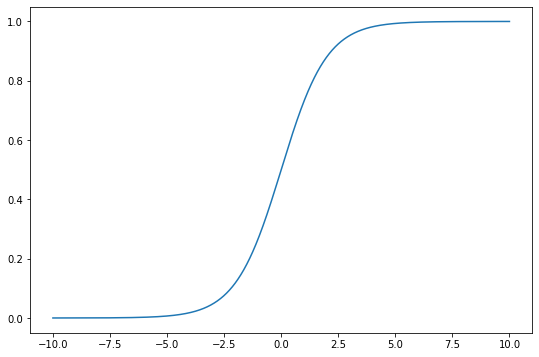

In [3]:
import matplotlib.pyplot as plt

n = np.linspace(-10.0, 10.0, 2000)

plt.figure(figsize = (9, 6))
plt.plot(n, sigmoid(n))
plt.show()

* softmax( )

In [4]:
def softmax(x):
    m = np.max(x)
    sm = np.exp(x - m)/np.sum(np.exp(x - m))
    return sm

* softmax( ) 시각화

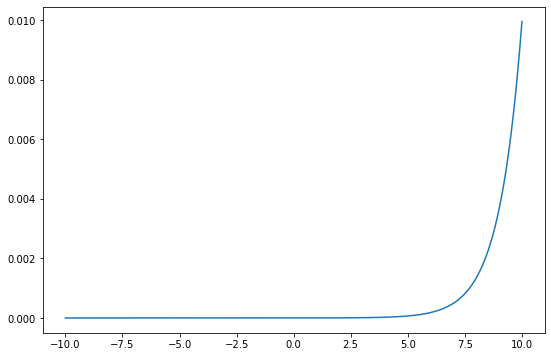

In [5]:
import matplotlib.pyplot as plt

n = np.linspace(-10.0, 10.0, 2000)

plt.figure(figsize = (9, 6))
plt.plot(n, softmax(n))
plt.show()

> ## 2) sigmoid( ) vs. softmax( ) 결과 비교

* 가상의 y_hat

In [6]:
y_hat = np.array([5.2, 4.8, 5.0]) #activation 적용 전 의 값

* Sigmoid Activation 적용

In [7]:
np.set_printoptions(suppress = True, precision = 5)

print(sigmoid(y_hat))
print('%.5f' % np.sum(sigmoid(y_hat)))

[0.99451 0.99184 0.99331]
2.97966


* Softmax Activation 적용

In [8]:
np.set_printoptions(suppress = True)

print(softmax(y_hat))
print('%.5f' % np.sum(softmax(y_hat)))

[0.40176 0.26931 0.32893]
1.00000


> ## 3) 추가 학습 진행 후 변화 비교

* 가상의 y_hat 업데이트

In [ ]:
y_hat = np.array([3.8, 1.4, 0.5])

* Sigmoid Activation 재적용

In [ ]:
print(sigmoid(y_hat))
print('%.5f' % np.sum(sigmoid(y_hat)))

[0.97812 0.80218 0.62246]
2.40276


* Softmax Activation 재적용

In [ ]:
print(softmax(y_hat))
print('%.5f' % np.sum(softmax(y_hat)))

[0.88684 0.08045 0.03271]
1.00000


# 
# 
# 
# The End
# 
# 
# 